In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd


path = "/content/drive/My Drive/fire_predict/base_data/"
df_train = pd.read_csv(path + "PJT002_train.csv")
df_val = pd.read_csv(path + "PJT002_validation.csv")
df_test = pd.read_csv(path + "PJT002_test.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
binary_y = {'N': 0, 'Y': 1}

df_train['fr_yn'] = df_train['fr_yn'].map(binary_y)
df_val['fr_yn'] = df_val['fr_yn'].map(binary_y)

In [0]:
def f_data(df_train, df_val, df_test):

    X_train = df_train.drop(['fr_yn'], 1)
    y_train = df_train['fr_yn']
    X_val = df_val.drop(['fr_yn'], 1)
    y_val = df_val['fr_yn']
    X_test = df_test

    df_all = pd.concat([X_train, X_val, X_test])

    categorical_cols = df_all.select_dtypes(['object']).columns
    for col in categorical_cols:
        df_all[col] = pd.Categorical(df_all[col]).codes

    X_train = df_all[:len(df_train)]
    X_val = df_all[len(df_train):-len(df_test)]
    X_test = df_all[-len(df_test):]

    X_train = X_train.fillna(-1)
    X_val = X_val.fillna(-1)
    X_test = X_test.fillna(-1)

    return X_train, y_train, X_val, y_val, X_test

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from tqdm import tqdm

def f1_rfc(X_train, y_train, X_val, y_val):
    result_list = []
    for i in tqdm(range(10)):

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_val)
        result = f1_score(y_val, y_pred)
        result_list.append(result)
    return sum(result_list) / len(result_list)

In [72]:
df_train_2 = df_train
df_val_2 = df_val
df_test_2 = df_test
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
100%|██████████| 10/10 [02:11<00:00, 13.18s/it]


0.49350649350649356

# drop id

In [0]:
df_train_2 = df_train
df_val_2 = df_val
df_test_2 = df_test

In [0]:
df_train_2 = df_train_2.drop("id", axis=1)
df_val_2 = df_val_2.drop("id", axis=1)
df_test_2 = df_test_2.drop("id", axis=1)

In [75]:
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
100%|██████████| 10/10 [02:09<00:00, 13.04s/it]


0.49958228905597324

# drop fr_dt

In [0]:
df_train_2 = df_train
df_val_2 = df_val
df_test_2 = df_test

In [0]:
df_train_2 = df_train_2.drop("dt_of_fr", axis=1)
df_val_2 = df_val_2.drop("dt_of_fr", axis=1)
df_test_2 = df_test_2.drop("dt_of_fr", axis=1)

In [78]:
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
100%|██████████| 10/10 [02:10<00:00, 13.01s/it]


0.49501661129568103

# 날짜를 년도만

In [79]:
df_train = pd.read_csv(path + "PJT002_train.csv")
df_val = pd.read_csv(path + "PJT002_validation.csv")
df_test = pd.read_csv(path + "PJT002_test.csv")

binary_y = {'N': 0, 'Y': 1}

df_train['fr_yn'] = df_train['fr_yn'].map(binary_y)
df_val['fr_yn'] = df_val['fr_yn'].map(binary_y)

df_train_2 = df_train
df_val_2 = df_val
df_test_2 = df_test

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
import math


def year(x):
    if x != "NaN":
        if isinstance(x, float):
            if not math.isnan(x):
                if int(x) >10000000:
                    return x // 10000
                elif int(x) > 1000000:
                    return x // 1000
                elif int(x) > 100000:
                    return x // 100
                elif int(x) > 10000:
                    return x // 10
                elif int(x) > 1000:
                    return x
        elif isinstance(x, str):
            return int(x[:4])

In [0]:
import numpy as np
import math


df_train_2["dt_of_athrztn"] = df_train_2["dt_of_athrztn"].apply(year)
df_train_2["dt_of_athrztn"] = df_train_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)
df_val_2["dt_of_athrztn"] = df_val_2["dt_of_athrztn"].apply(year)
df_val_2["dt_of_athrztn"] = df_val_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)
df_test_2["dt_of_athrztn"] = df_test_2["dt_of_athrztn"].apply(year)
df_test_2["dt_of_athrztn"] = df_test_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 1.1000e+01,
        1.7000e+01, 2.4500e+02, 2.5810e+03, 7.4870e+03, 2.1266e+04]),
 array([1646. , 1683.2, 1720.4, 1757.6, 1794.8, 1832. , 1869.2, 1906.4,
        1943.6, 1980.8, 2018. ]),
 <a list of 10 Patch objects>)

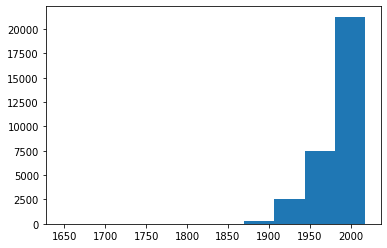

In [82]:
from matplotlib import pyplot as plt


plt.hist(df_train["dt_of_athrztn"])

In [83]:
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
100%|██████████| 10/10 [02:15<00:00, 13.52s/it]


0.5010250102501024

## 인구 범주화

In [84]:
df_train = pd.read_csv(path + "PJT002_train.csv")
df_val = pd.read_csv(path + "PJT002_validation.csv")
df_test = pd.read_csv(path + "PJT002_test.csv")

binary_y = {'N': 0, 'Y': 1}

df_train['fr_yn'] = df_train['fr_yn'].map(binary_y)
df_val['fr_yn'] = df_val['fr_yn'].map(binary_y)

df_train_2 = df_train
df_val_2 = df_val
df_test_2 = df_test

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
def population(x):
    if x < 1000:
        return "1k"
    elif x < 10000:
        return "10k"
    elif x < 100000:
        return "100k"
    elif x < 1000000:
        return "1000k"

In [0]:
df_train_2["hm_cnt"] = df_train_2["hm_cnt"].apply(population)
df_val_2["hm_cnt"] = df_val_2["hm_cnt"].apply(population)
df_test_2["hm_cnt"] = df_test_2["hm_cnt"].apply(population)

In [87]:
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
100%|██████████| 10/10 [02:13<00:00, 13.36s/it]


0.4879467996674979

# log화

In [88]:
df_train = pd.read_csv(path + "PJT002_train.csv")
df_val = pd.read_csv(path + "PJT002_validation.csv")
df_test = pd.read_csv(path + "PJT002_test.csv")

binary_y = {'N': 0, 'Y': 1}

df_train['fr_yn'] = df_train['fr_yn'].map(binary_y)
df_val['fr_yn'] = df_val['fr_yn'].map(binary_y)

df_train_2 = df_train
df_val_2 = df_val
df_test_2 = df_test

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
df_train_2.iloc[:, -16:-8] = df_train_2.iloc[:, -16:-8].replace({0:1})
df_train_2.iloc[:, -16:-8] = df_train_2.iloc[:, -16:-8].apply(lambda x: np.log(x) if True else x)

df_train_2[["bldng_ar", "ttl_ar", "lnd_ar"]] = df_train_2[["bldng_ar", "ttl_ar", "lnd_ar"]].replace({0:1})

df_train_2[["bldng_ar", "ttl_ar", "lnd_ar"]] = df_train_2[["bldng_ar", "ttl_ar", "lnd_ar"]].apply(lambda x: np.log(x) if True else x)

df_val_2[["bldng_ar", "ttl_ar", "lnd_ar"]] = df_val_2[["bldng_ar", "ttl_ar", "lnd_ar"]].replace({0:1})

df_val_2[["bldng_ar", "ttl_ar", "lnd_ar"]] = df_val_2[["bldng_ar", "ttl_ar", "lnd_ar"]].apply(lambda x: np.log(x) if True else x)

df_train_2[["bldng_ar", "ttl_ar", "lnd_ar"]] = df_train_2[["bldng_ar", "ttl_ar", "lnd_ar"]].replace({0:1})

df_test_2[["bldng_ar", "ttl_ar", "lnd_ar"]] = df_test_2[["bldng_ar", "ttl_ar", "lnd_ar"]].apply(lambda x: np.log(x) if True else x)
df_train_2[["bldng_ar", "ttl_ar", "lnd_ar"]].describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,bldng_ar,ttl_ar,lnd_ar
count,59199.000000,59199.000000,59199.000000
mean,4.249598,4.520614,3.948998
std,1.789978,1.931368,2.744359
min,1.000000,1.000000,0.088926
25%,3.834710,3.922963,1.000000
50%,4.474264,4.576771,5.075174
75%,5.044070,5.367913,6.100319
max,13.258463,16.329316,19.133132


In [90]:
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
100%|██████████| 10/10 [02:16<00:00, 13.60s/it]


0.47409126063418405

# 결측치 많은 데이터 제거

In [91]:
df_train = pd.read_csv(path + "PJT002_train.csv")
df_val = pd.read_csv(path + "PJT002_validation.csv")
df_test = pd.read_csv(path + "PJT002_test.csv")

binary_y = {'N': 0, 'Y': 1}

df_train['fr_yn'] = df_train['fr_yn'].map(binary_y)
df_val['fr_yn'] = df_val['fr_yn'].map(binary_y)

df_train_2 = df_train
df_val_2 = df_val
df_test_2 = df_test

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
df_train_2.iloc[:, 137:151]

,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
lws = list(df_train_2.iloc[:, 137:151].columns)
df_train_2 = df_train_2.drop(lws, axis=1)
df_val_2 = df_val_2.drop(lws, axis=1)
df_test_2 = df_test_2.drop(lws, axis=1)

In [94]:
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
100%|██████████| 10/10 [02:08<00:00, 12.84s/it]


0.4922448979591837

#log 와 결측치 제거를 제외한 전처리

In [95]:
df_train = pd.read_csv(path + "PJT002_train.csv")
df_val = pd.read_csv(path + "PJT002_validation.csv")
df_test = pd.read_csv(path + "PJT002_test.csv")

binary_y = {'N': 0, 'Y': 1}

df_train['fr_yn'] = df_train['fr_yn'].map(binary_y)
df_val['fr_yn'] = df_val['fr_yn'].map(binary_y)

df_train_2 = df_train
df_val_2 = df_val
df_test_2 = df_test

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_train_2 = df_train_2.drop("id", axis=1)
df_val_2 = df_val_2.drop("id", axis=1)
df_test_2 = df_test_2.drop("id", axis=1)

In [0]:
df_train_2 = df_train_2.drop("dt_of_fr", axis=1)
df_val_2 = df_val_2.drop("dt_of_fr", axis=1)
df_test_2 = df_test_2.drop("dt_of_fr", axis=1)

In [0]:
import math
import numpy as np
import math


def year(x):
    if x != "NaN":
        if isinstance(x, float):
            if not math.isnan(x):
                if int(x) >10000000:
                    return x // 10000
                elif int(x) > 1000000:
                    return x // 1000
                elif int(x) > 100000:
                    return x // 100
                elif int(x) > 10000:
                    return x // 10
                elif int(x) > 1000:
                    return x
        elif isinstance(x, str):
            return int(x[:4])




df_train_2["dt_of_athrztn"] = df_train_2["dt_of_athrztn"].apply(year)
df_train_2["dt_of_athrztn"] = df_train_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)
df_val_2["dt_of_athrztn"] = df_val_2["dt_of_athrztn"].apply(year)
df_val_2["dt_of_athrztn"] = df_val_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)
df_test_2["dt_of_athrztn"] = df_test_2["dt_of_athrztn"].apply(year)
df_test_2["dt_of_athrztn"] = df_test_2["dt_of_athrztn"].apply(lambda x: None if x > 3000 else x)



In [0]:
def population(x):
    if x < 1000:
        return "1k"
    elif x < 10000:
        return "10k"
    elif x < 100000:
        return "100k"
    elif x < 1000000:
        return "1000k"

df_train_2["hm_cnt"] = df_train_2["hm_cnt"].apply(population)
df_val_2["hm_cnt"] = df_val_2["hm_cnt"].apply(population)
df_test_2["hm_cnt"] = df_test_2["hm_cnt"].apply(population)

In [100]:
X_train, y_train, X_val, y_val, X_test = f_data(df_train_2, df_val_2, df_test_2)
f1_rfc(X_train, y_train, X_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':
100%|██████████| 10/10 [02:04<00:00, 12.44s/it]


0.498397435897436

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np


def score_predict(model, X_val):
    y_pred = model.predict(X_val)

    return f1_score(y_val, y_pred)

def fit_g_boost(X_train, y_train):

    GBoost = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   random_state =5)
    GBoost.fit(X_train, y_train)

    return GBoost

def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

def fit_xgb(X_train, y_train):

    model_xgb = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                                learning_rate=0.05, max_depth=3, 
                                min_child_weight=1.7817, n_estimators=2200,
                                reg_alpha=0.4640, reg_lambda=0.8571,
                                subsample=0.5213, silent=1,
                                random_state =7, nthread = -1,
                                objective='binary:logistic')
    model_xgb.fit(X_train, y_train, eval_metric=f1_eval)
    return model_xgb

def fit_lgb(X_train, y_train):

    model_lgb = lgb.LGBMClassifier(objective='binary',num_leaves=5,
                            learning_rate=0.05, n_estimators=720,
                            max_bin = 55, bagging_fraction = 0.8,
                            bagging_freq = 5, feature_fraction = 0.2319,
                            feature_fraction_seed=9, bagging_seed=9,
                            min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    model_lgb.fit(X_train, y_train, eval_metric=f1_eval)
    return model_lgb


def average_predict(models, X_val):
    predictions = np.column_stack([
        model.predict(X_val) for model in models
    ])
    return np.round(np.mean(predictions, axis=1))

def total_predict(X_train, y_train, X_val):

    model_g_boost = fit_g_boost(X_train, y_train)
    model_xgb = fit_xgb(X_train, y_train)
    model_lgb = fit_lgb(X_train, y_train)

    f1_g_boost = score_predict(model_g_boost, X_val)
    f1_xgb = score_predict(model_xgb, X_val)
    f1_lgb = score_predict(model_lgb, X_val)
    predict_average = average_predict((model_g_boost, model_xgb, model_lgb),
                                    X_val)
    f1_score_average = f1_score(y_val, predict_average)
    return [[f1_g_boost, f1_xgb, f1_lgb], f1_score_average]

In [102]:
total_predict(X_train.values, y_train, X_val.values)

[[0.46880415944540726, 0.4833403627161535, 0.4718804920913884],
 0.47366129734436224]